### Senior Insights Analyst Task

<b>Task Overview:</b>
As a Senior Insights Analyst for B.C, the reporting, analysis and insights you deliver will play a crucial role in helping us to make informed decisions, optimise our operations, and measure the impact of our programs. To assess your abilities and suitability for this role, we have prepared a practical task that involves analysing a dataset and providing actionable insights.

Task instructions:
* Along with this instruction pack, we have provided you with a dataset called “RG data.xlsx”.<b>The dataset contains information related to supporters providing regular gifts to the charity since 2010 and donation amounts.</b> Familiarise yourself with the dataset’s structure and its variables. If necessary, clean and preprocess the data to ensure it is ready for analysis. 
* Conduct exploratory data analysis to <b>gain insights into the performance of each of the regular gifts.</b> Perform any necessary statistical analyses to <b>identify trends, patterns and correlations within the data.</b> In doing so, <b>think about the different channels, frequencies, and dates.</b>
* <b>Create visualisations (charts, graphics)</b> that effectively communicate your findings to <b>non-technical stakeholders.</b> Ensure that these are clear, insightful and support your conclusions
* Based on your analysis and visualisations, <b>provide a summary of the key insights gained from the data. Suggest any data-driven recommendations from the data available.</b> 

<b>Output:</b>
Prepare a 10-15 minute presentation (based on the above) documenting your analysis, insights and recommendations. 

In [51]:
# Import libraries and packages I may need for analysis & visualising the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy import stats
# Make sure all columns in the dataframe are visible for easier inspection
pd.set_option("max_columns", None)

### Data Cleaning/Pre-processing & Feature Engineering

In [52]:
# Import the data from my downloads folder and convert to Pandas DataFrame
df = pd.read_excel(r'C:\Users\david\Downloads\RG data.xlsx')
# Inspect the data: cols, length, types, nulls
df.info() 
# Data looks nice and clean: no nulls, uniform length, column names make sense, data types seem appropriate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Regular Gift type               648 non-null    object
 1   Frequency of gift               648 non-null    object
 2   Channel                         648 non-null    object
 3   Year                            648 non-null    int64 
 4   Month                           648 non-null    object
 5   Number of new donors per month  648 non-null    int64 
 6   Cancellations this month        648 non-null    int64 
 7   Total value of donations        648 non-null    int64 
 8   Total numbe rof donations       648 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 45.7+ KB


In [53]:
# Summary statistics
df.describe()
# Data is right skewed: mean is higher than 75th percentile, which indicates presence of outliers
# These will need to be handled for any regression modelling

,Year,Number of new donors per month,Cancellations this month,Total value of donations,Total numbe rof donations
count,648.000000,648.000000,648.000000,648.000000,648.000000
mean,2019.757716,216.175926,71.845679,19770.478395,3041.441358
std,2.110898,586.270954,318.874393,46431.203450,7658.412950
min,2010.000000,2.000000,0.000000,0.000000,0.000000
25%,2018.000000,4.000000,0.000000,382.000000,56.000000
50%,2020.000000,22.000000,0.000000,2481.000000,344.000000
75%,2021.000000,132.000000,18.000000,17567.000000,2960.500000
max,2024.000000,5098.000000,3180.000000,518812.000000,102132.000000


In [54]:
# Inspect a random sample of data to get a better feel for it
df.sample(10)

,Regular Gift type,Frequency of gift,Channel,Year,Month,Number of new donors per month,Cancellations this month,Total value of donations,Total numbe rof donations
587,Sponsorship,Monthly,Online,2017,October,112,82,17138,3244
303,Lottery,Monthly,Direct Mail,2019,August,2,0,18,2
412,Lottery,Monthly,Facebook,2019,September,264,0,35744,6404
235,core,Annually,Online,2018,January,2,0,300,12
246,core,Annually,Online,2019,October,6,6,0,0
514,Lottery,Monthly,Online,2022,January,28,0,2716,472
133,core,Monthly,Online,2017,April,94,58,22430,3748
360,Lottery,Monthly,Face 2 Face,2018,April,1052,2,88640,17364
352,Lottery,Monthly,Face 2 Face,2017,August,280,0,21076,4592
259,core,Annually,Online,2022,February,4,0,82,8


In [55]:
# Checking for duplicates - none found
x = df.duplicated().sort_values(ascending=True)
x.unique()

array([False])

In [56]:
# Column spelling corrected
df.rename({'Total numbe rof donations': 'Total number of donations'}, axis=1, inplace=True)

In [57]:
# Convert Month to numerical representation
month_to_number = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                   'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['Month'] = df['Month'].map(month_to_number)

# Create a new 'Date' column by combining 'Year' and 'Month'
df['Month Year'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Convert 'Date' back to month name format
df['Month'] = df['Month Year'].dt.strftime('%B')

In [58]:
# Sort months into calendar order
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=sort_order, ordered=True)

In [59]:
# Calculate the average donation value (£)
df['Mean Donation £'] = round(df['Total value of donations'] / df['Total number of donations'],1)

In [60]:
# Calculate Ratio of Cancellations to no. donations
df['Cancellation to Donation Ratio'] = round(df['Cancellations this month'] / df['Total number of donations'],1)
df.loc[~np.isfinite(df['Cancellation to Donation Ratio']), 'Cancellation to Donation Ratio'] = np.nan
df = df.sort_values('Cancellation to Donation Ratio', ascending=False)

In [61]:
# Calculate Ratio of Cancellations to no. new donors
df['Cancellation to New Donor Ratio'] = round(df['Cancellations this month'] / df['Number of new donors per month'],1)
df.loc[~np.isfinite(df['Cancellation to New Donor Ratio']), 'Cancellation to New Donor Ratio'] = np.nan
df = df.sort_values('Cancellation to New Donor Ratio', ascending=False)

In [62]:
# Calculate ratio of new donors to no. donations
df['New Donor to Donations Ratio'] = round(df['Number of new donors per month'] / df['Total number of donations'],1)
df.loc[~np.isfinite(df['New Donor to Donations Ratio']), 'New Donor to Donations Ratio'] = np.nan
df = df.sort_values('New Donor to Donations Ratio', ascending=False)

In [63]:
# Calculate the net flow of donors each month (new donors minus cancellations)
df['Net Donor Flow'] = df['Number of new donors per month'] - df['Cancellations this month']
df = df.sort_values('Net Donor Flow', ascending=True)
df.reset_index(drop=True, inplace=True)
df

,Regular Gift type,Frequency of gift,Channel,Year,Month,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations,Month Year,Mean Donation £,Cancellation to Donation Ratio,Cancellation to New Donor Ratio,New Donor to Donations Ratio,Net Donor Flow
0,Sponsorship,Monthly,Online,2023,June,4,4,20,2,2023-06-01,10.0,2.0,1.0,2.0,0
1,core,Annually,Online,2023,May,2,2,72,2,2023-05-01,36.0,1.0,1.0,1.0,0
2,core,Annually,Online,2020,November,2,2,10,2,2020-11-01,5.0,1.0,1.0,1.0,0
3,core,Annually,Online,2020,May,2,2,40,2,2020-05-01,20.0,1.0,1.0,1.0,0
4,core,Annually,Online,2019,December,16,16,62,20,2019-12-01,3.1,0.8,1.0,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Lottery,Monthly,Face 2 Face,2019,July,2620,0,261554,54824,2019-07-01,4.8,0.0,0.0,0.0,2620
644,Lottery,Monthly,Face 2 Face,2019,September,2676,0,288428,58828,2019-09-01,4.9,0.0,0.0,0.0,2676
645,Lottery,Monthly,Face 2 Face,2019,August,2682,0,260842,54520,2019-08-01,4.8,0.0,0.0,0.0,2682
646,Lottery,Monthly,Face 2 Face,2018,June,2708,0,191150,40648,2018-06-01,4.7,0.0,0.0,0.1,2708


In [64]:
# Split the columns into numerical and categorical variables for easier analysis
numerical = ['Number of new donors per month', 'Cancellations this month', 'Total value of donations', 'Total number of donations', 'Mean Donation £', 'Cancellation to Donation Ratio', 'Cancellation to New Donor Ratio', 'New Donor to Donations Ratio', 'Net Donor Flow']
categorical = ['Regular Gift type', 'Frequency of gift', 'Channel', 'Year', 'Month', 'Month Year']
df1 = df[numerical + categorical]

In [70]:
# Calculate the inter-quartile ranges (IQR) for numerical cols
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                                   3.0
Number of new donors per month       128.0
Cancellations this month              18.0
Total value of donations           17185.0
Total number of donations           2904.5
Mean Donation £                        3.7
Cancellation to Donation Ratio         0.0
Cancellation to New Donor Ratio        0.5
New Donor to Donations Ratio           0.1
Net Donor Flow                        70.0
dtype: float64


In [16]:
# Outliers Removed for regression analysis later

# for i in df[numerical].columns:
#     median_v = df[numerical][i].quantile(0.50)
#     Q1 = df[numerical][i].quantile(0.25)
#     Q3 = df[numerical][i].quantile(0.75)
#     IQR = Q3 - Q1
#     df.loc[df[numerical][i] < (Q1 - 1.5 * IQR), numerical] = median_v

# df[numerical].describe()

In [17]:
# -1 to +1 = normal distribution. All cols appear to be positively skewed
skew_df = pd.DataFrame(columns=['Column', 'Skew'])

for column in df[numerical].columns:
    skew_value = df[numerical][column].skew()
    skew_df = skew_df.append({'Column': column, 'Skew': skew_value}, ignore_index=True)
skew_df

,Column,Skew
0,Number of new donors per month,4.752129
1,Cancellations this month,6.801377
2,Total value of donations,4.715639
3,Total number of donations,6.269584
4,Mean Donation £,23.861182
5,Cancellation to Donation Ratio,5.892354
6,Cancellation to New Donor Ratio,1.064874
7,New Donor to Donations Ratio,3.376612
8,Net Donor Flow,5.780503


### Data Exploration

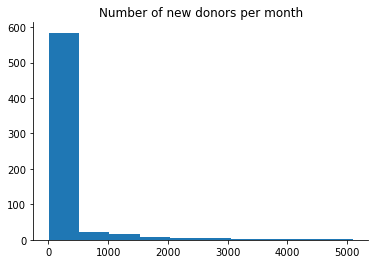

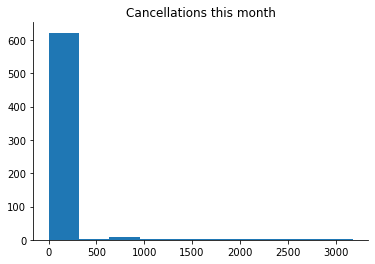

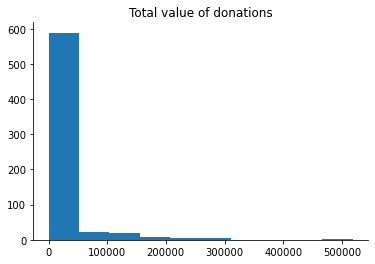

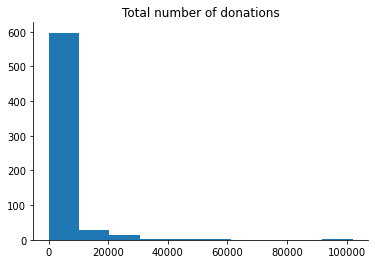

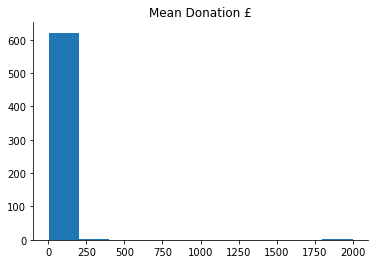

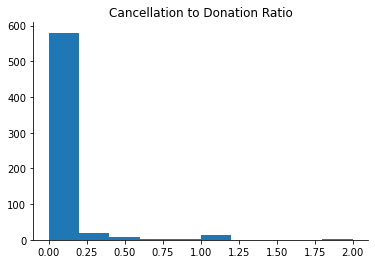

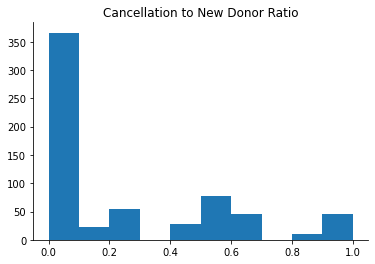

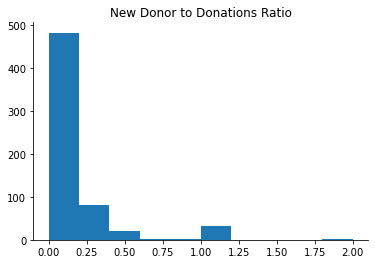

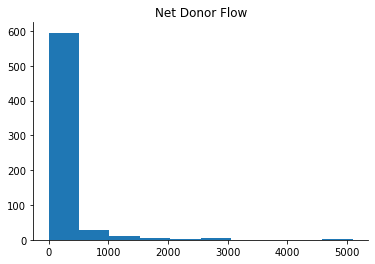

In [18]:
# Plot distributions of numerical variables
# sns.set_style("ticks")
for i in df1[numerical].columns:
    plt.hist(df1[numerical][i])
    plt.title(i)
    plt.show(sns.despine())

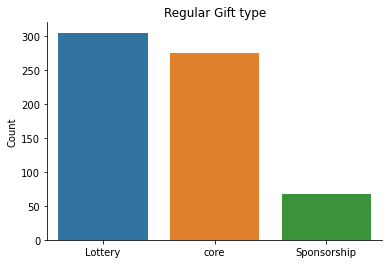

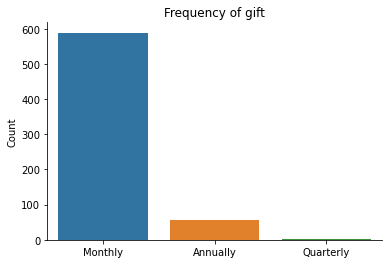

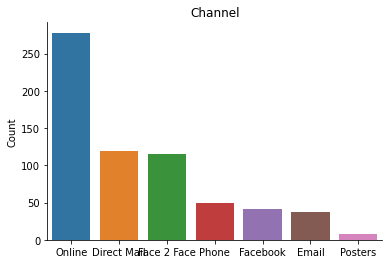

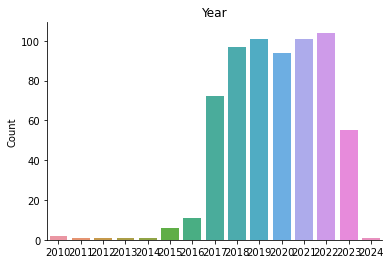

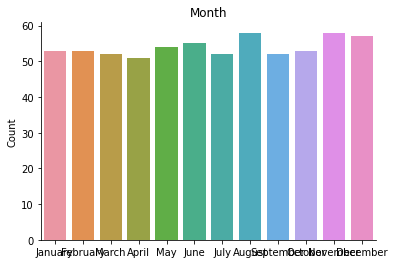

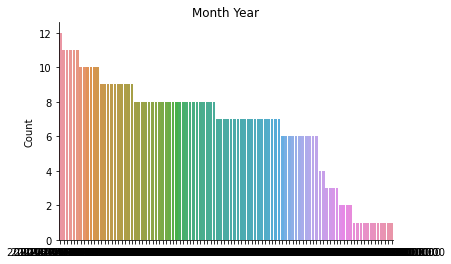

In [19]:
# Create barplots to visualise the categorical variables
for i in df1[categorical].columns:
    ax = sns.barplot(x=df1[categorical][i].value_counts().index, y=df1[categorical][i].value_counts())
    ax.set_title(i)
    ax.set_ylabel("Count")
    plt.show(sns.despine())

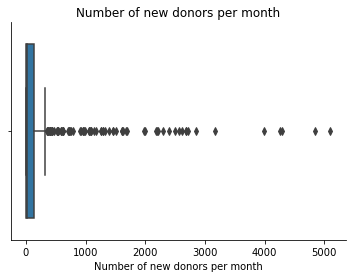

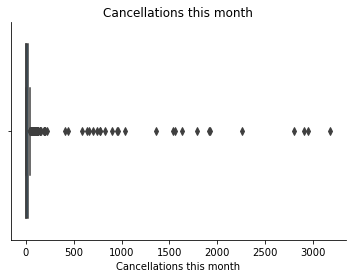

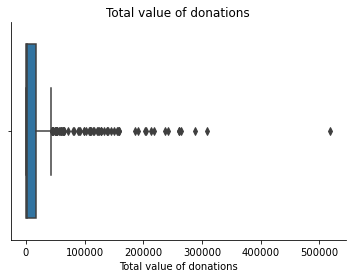

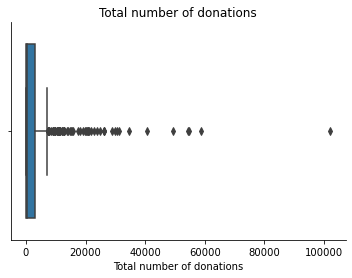

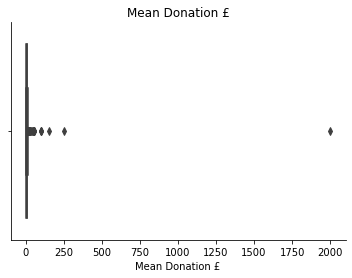

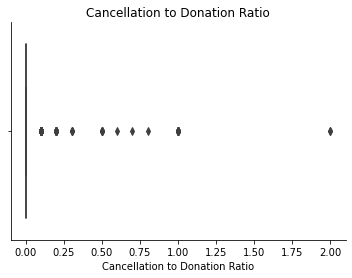

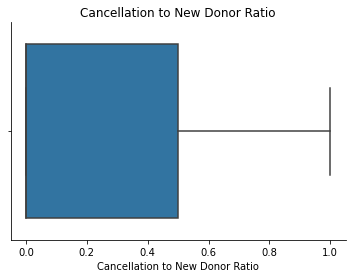

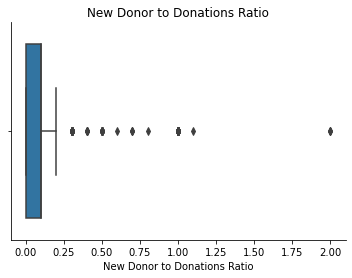

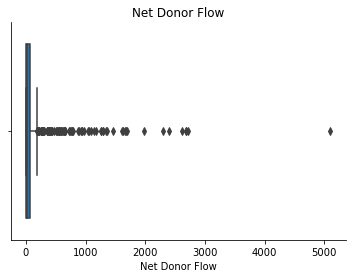

In [20]:
# Boxplots of the numerical varaibles to eyeball the dispersion (IQR & outliers) of the data
for i in df1[numerical].columns:
    ax = sns.boxplot(x=df1[numerical][i])
    ax.set_title(i)
    plt.show(sns.despine())
    
# Limited data before Year 2014
# Many months when no. new donors far exceeded the mean. What caused these bumbper months? - Investigate
# Cancellations has a very tight IQR and a number of extreme outliers - worth investigating
# 1 Donation >£500,00.00!
# 1 month in which total no. donations exceeded 100k - what happened during this month and how can we replicate?

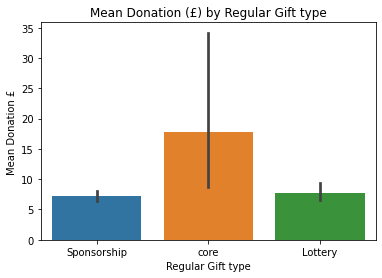

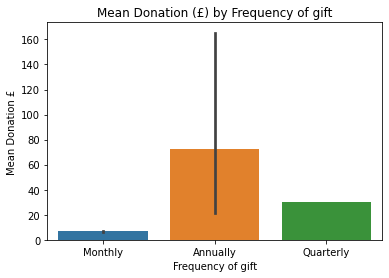

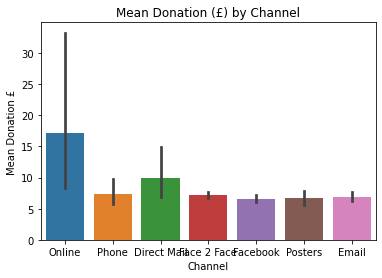

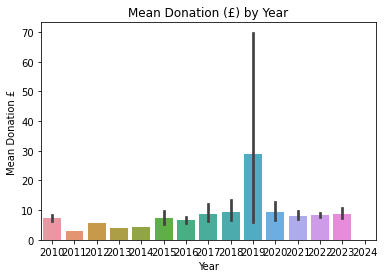

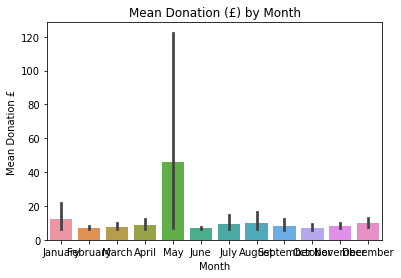

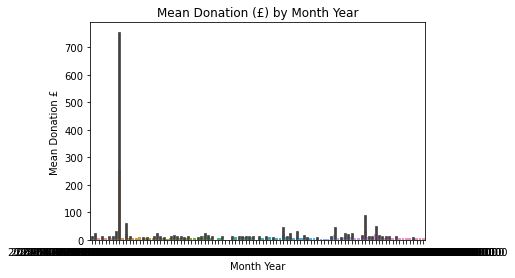

In [21]:
# Plot Avg Donation amount by categorical vars
for column in df1[categorical].columns:
    # Create a barplot for each column
    sns.barplot(data=df1, x=column, y='Mean Donation £')
    plt.title(f'Mean Donation (£) by {column}')
    plt.show()

In [22]:
# df1[df1['Mean Donation £'] == max(df['Mean Donation £'])]
top_ten_rows = df1.nlargest(10, 'Mean Donation £')
top_ten_rows

,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations,Mean Donation £,Cancellation to Donation Ratio,Cancellation to New Donor Ratio,New Donor to Donations Ratio,Net Donor Flow,Regular Gift type,Frequency of gift,Channel,Year,Month,Month Year
8,2,2,8000,4,2000.0,0.5,1.0,0.5,0,core,Annually,Online,2019,May,2019-05-01
155,2,0,2500,10,250.0,0.0,0.0,0.2,2,core,Annually,Direct Mail,2019,January,2019-01-01
58,2,0,1248,8,156.0,0.0,0.0,0.2,2,Lottery,Annually,Online,2018,August,2018-08-01
140,2,0,624,6,104.0,0.0,0.0,0.3,2,Lottery,Annually,Online,2020,July,2020-07-01
163,4,0,832,8,104.0,0.0,0.0,0.5,4,Lottery,Annually,Online,2017,September,2017-09-01
114,4,2,1380,14,98.6,0.1,0.5,0.3,2,core,Annually,Online,2020,April,2020-04-01
119,2,0,318,6,53.0,0.0,0.0,0.3,2,core,Annually,Direct Mail,2021,December,2021-12-01
123,2,0,312,6,52.0,0.0,0.0,0.3,2,Lottery,Annually,Phone,2018,November,2018-11-01
129,2,0,104,2,52.0,0.0,0.0,1.0,2,Lottery,Annually,Direct Mail,2018,October,2018-10-01
144,2,0,312,6,52.0,0.0,0.0,0.3,2,Lottery,Annually,Online,2020,December,2020-12-01


<AxesSubplot:>

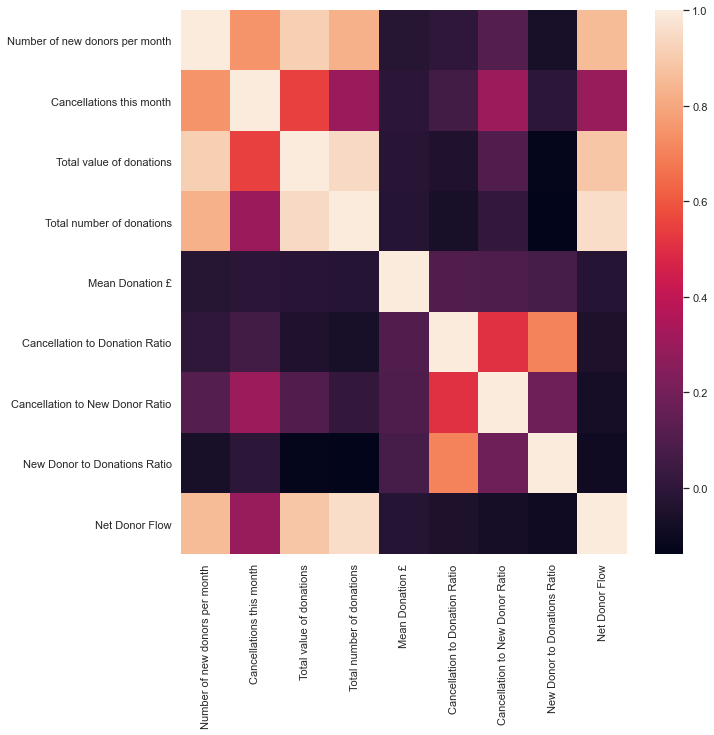

In [23]:
# Heatmap of correlations between numerical variables
sns.set(rc={'figure.figsize':(10,10)})
df1[numerical].corr()
sns.heatmap(df1[numerical].corr())

In [24]:
# Values of correlations:
# Unsurprisingly, no. new donors per month is highly correlated to total value of donations (0.91) and total no. donations (0.83)
# Total value & Total no. donations = 0.94 (strongest)
# Interestingly, no. of new donors is correlated to no. cancellations: 0.75 - this seems counterintuitive... - investigate
df1[numerical].corr()

,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations,Mean Donation £,Cancellation to Donation Ratio,Cancellation to New Donor Ratio,New Donor to Donations Ratio,Net Donor Flow
Number of new donors per month,1.000000,0.747863,0.912061,0.827732,-0.020131,0.000022,0.114323,-0.065930,0.854217
Cancellations this month,0.747863,1.000000,0.542614,0.300600,-0.006706,0.063730,0.305982,-0.003384,0.293689
Total value of donations,0.912061,0.542614,1.000000,0.942389,-0.017605,-0.043866,0.098869,-0.127861,0.888338
Total number of donations,0.827732,0.300600,0.942389,1.000000,-0.026774,-0.063348,0.014790,-0.138890,0.956452
Mean Donation £,-0.020131,-0.006706,-0.017605,-0.026774,1.000000,0.099664,0.093450,0.073485,-0.023721
Cancellation to Donation Ratio,0.000022,0.063730,-0.043866,-0.063348,0.099664,1.000000,0.506396,0.702353,-0.049948
Cancellation to New Donor Ratio,0.114323,0.305982,0.098869,0.014790,0.093450,0.506396,1.000000,0.182914,-0.075022
New Donor to Donations Ratio,-0.065930,-0.003384,-0.127861,-0.138890,0.073485,0.702353,0.182914,1.000000,-0.092259
Net Donor Flow,0.854217,0.293689,0.888338,0.956452,-0.023721,-0.049948,-0.075022,-0.092259,1.000000


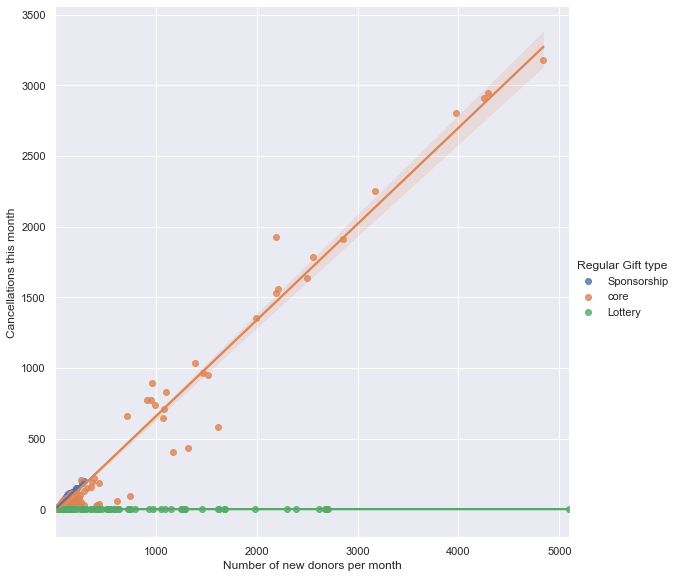

In [25]:
sns.lmplot(x='Number of new donors per month', y='Cancellations this month', hue='Regular Gift type', data=df1, height=8)

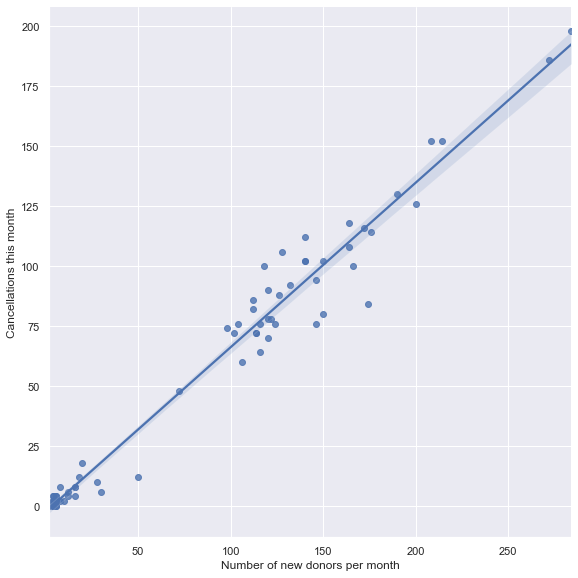

In [26]:
# Just checking the relationship for 'Sponsorship' gift type on its own
sns.lmplot(x='Number of new donors per month', y='Cancellations this month', data=df1[df1['Regular Gift type'] == 'Sponsorship'], height=8)

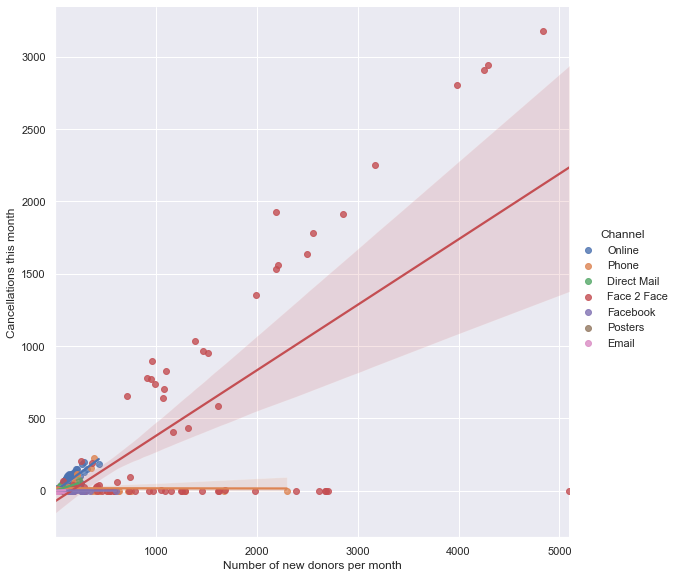

In [27]:
sns.lmplot(x='Number of new donors per month', y='Cancellations this month', hue='Channel', data=df1, height=8)
# data=df1[~df1['Channel'].isin(['Online'])]

<AxesSubplot:xlabel='Number of new donors per month', ylabel='Total value of donations'>

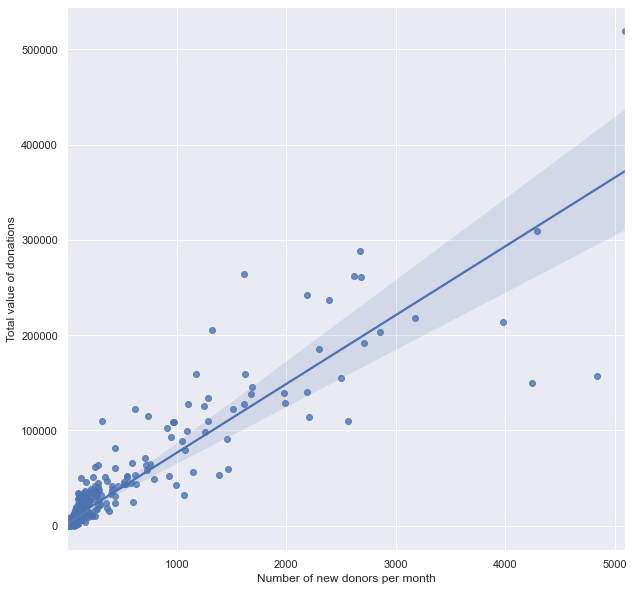

In [28]:
sns.regplot(x='Number of new donors per month', y='Total value of donations', data=df1)

<AxesSubplot:xlabel='Number of new donors per month', ylabel='Total number of donations'>

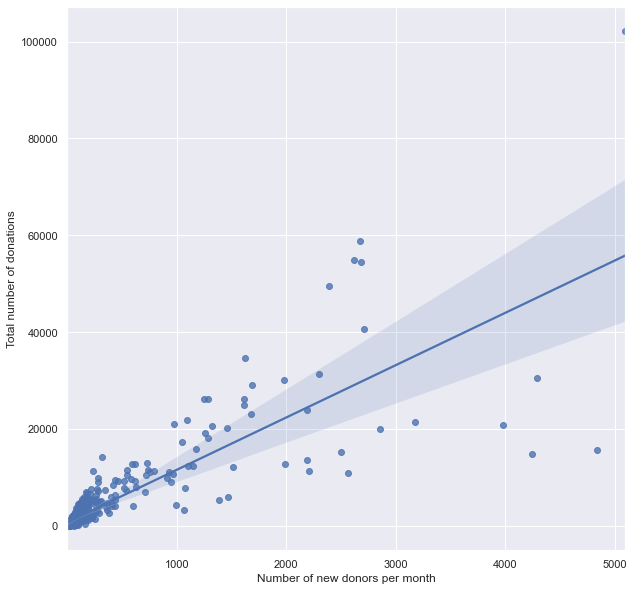

In [29]:
sns.regplot(x='Number of new donors per month', y='Total number of donations', data=df1)

<AxesSubplot:xlabel='Total value of donations', ylabel='Total number of donations'>

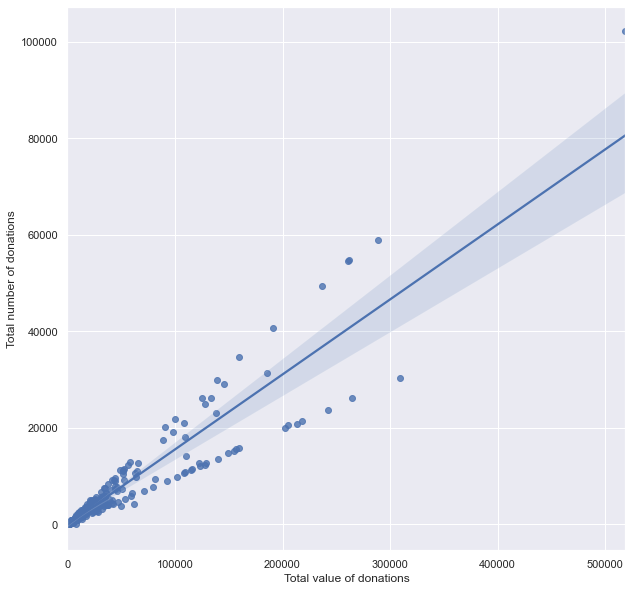

In [30]:
sns.regplot(x='Total value of donations', y='Total number of donations', data=df1)

In [31]:
df2 = pd.pivot_table(df1, index = 'Regular Gift type', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df2

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Regular Gift type,,,,
core,42604,71900,720120,6335220
Lottery,12,62194,1090390,5653894
Sponsorship,3940,5988,160344,822156


In [32]:
df3 = pd.pivot_table(df1, index = 'Frequency of gift', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df3

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Frequency of gift,,,,
Monthly,46464,139916,1970562,12792332
Annually,90,162,288,18818
Quarterly,2,4,4,120


In [33]:
df4 = pd.pivot_table(df1, index = 'Channel', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df4

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Channel,,,,
Face 2 Face,37060,100682,1198300,8032680
Online,8212,18416,442862,2808002
Phone,806,13768,176702,1045378
Facebook,4,4690,81710,517884
Direct Mail,460,2032,60084,340310
Email,14,464,10970,65470
Posters,0,30,226,1546


In [34]:
df5 = pd.pivot_table(df1, index = 'Year', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df5

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Year,,,,
2018,10044,30986,518720,3458994
2019,1996,26320,563028,2997120
2021,7950,22396,242430,1811256
2022,22410,35678,186500,1773638
2020,1284,11640,230974,1365000
2017,2056,10514,211580,1280056
2023,808,2176,6572,59470
2016,2,342,8404,49326
2015,4,16,1034,7556


<AxesSubplot:xlabel='Month', ylabel='Total value of donations'>

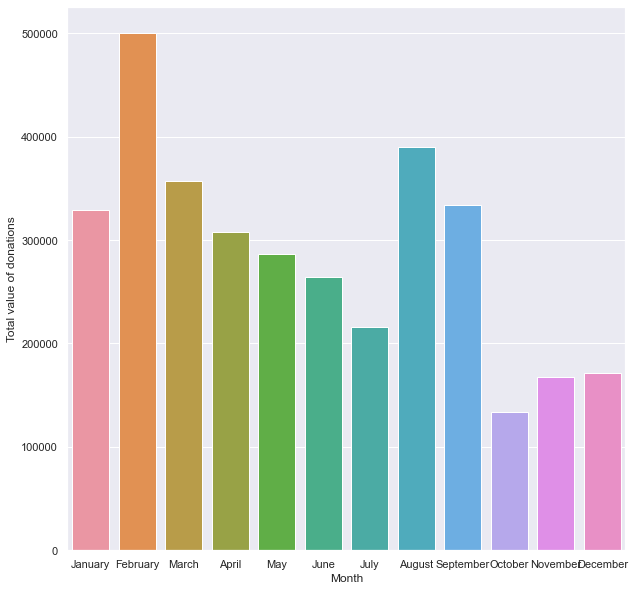

In [35]:
# Closer look at year 2018 when peak value of donations acheived
_2018 = df1.loc[df1['Year'] == 2018, ['Month','Total value of donations']].groupby(['Month']).sum().sort_values('Total value of donations', ascending=False)
_2018_ = _2018.reset_index()
sns.barplot(x='Month', y='Total value of donations', data=_2018_)
# What happened in Feb? Perhaps a campaign, appeal or fundraising event that was highly successful?

In [36]:
df6 = pd.pivot_table(df1, index = 'Month', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df6

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Month,,,,
May,3680,14910,230398,1431876
February,2782,11102,192986,1261598
September,5078,13468,192614,1226518
August,2608,11500,185022,1118362
November,7540,14702,137218,1098300
January,4670,11260,163462,1084332
April,2862,10234,151780,1018558
July,1602,10680,174988,995672
March,2718,9654,149484,992628


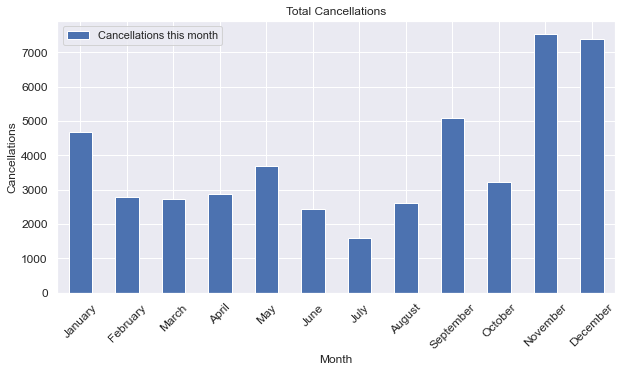

In [37]:
# Create the pivot table
df7 = pd.pivot_table(df1, index='Month', values=['Cancellations this month'], aggfunc='sum')

# Plot the data
df7.plot(kind='bar', figsize=[10, 5], ylabel="Cancellations", title="Total Cancellations", rot=45, fontsize=12)
plt.show()

In [38]:
# Some months missing from 2023
x = df1[['Year','Month']].drop_duplicates().sort_values('Year', ascending=False)
x.head(25)

,Year,Month
43,2024,March
0,2023,June
1,2023,May
40,2023,December
45,2023,July
52,2023,January
56,2023,August
55,2023,March
118,2023,April
124,2023,February


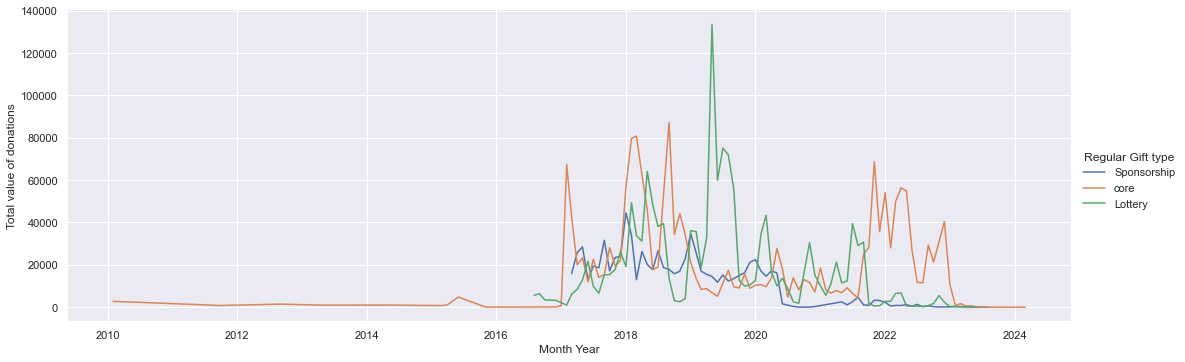

In [39]:
sns.relplot(data=df1[df1['Month Year'].between('2010-01-01','2024-03-01')], x='Month Year', y='Total value of donations',kind='line', hue='Regular Gift type', height=5, aspect=3, ci=None)

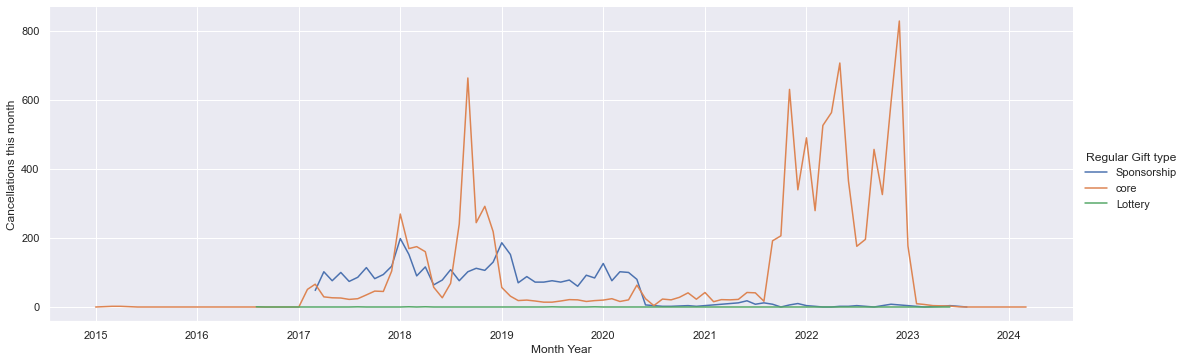

In [40]:
sns.relplot(data=df1[df1['Month Year'].between('2015-01-01','2024-03-01')], x='Month Year', y='Cancellations this month',kind='line',hue='Regular Gift type', height=5, aspect=3, ci=None)

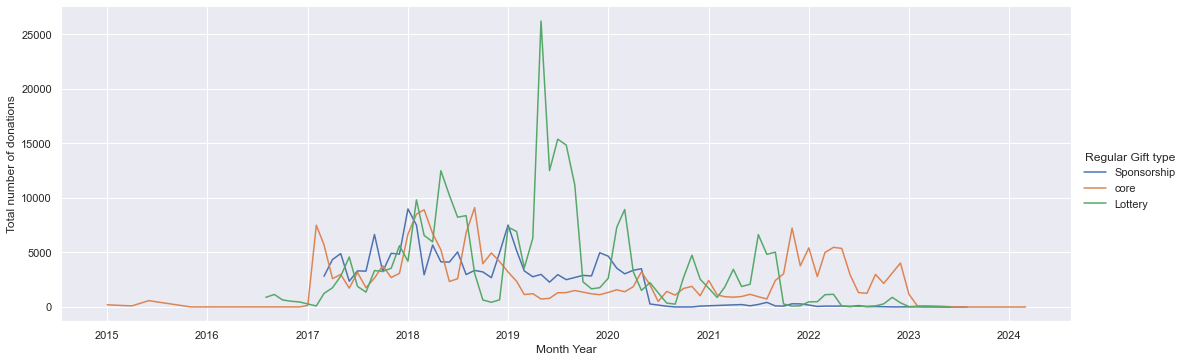

In [41]:
sns.relplot(data=df1[df1['Month Year'].between('2015-01-01','2024-03-01')], x='Month Year', y='Total number of donations',kind='line',hue='Regular Gift type', height=5, aspect=3, ci=None)

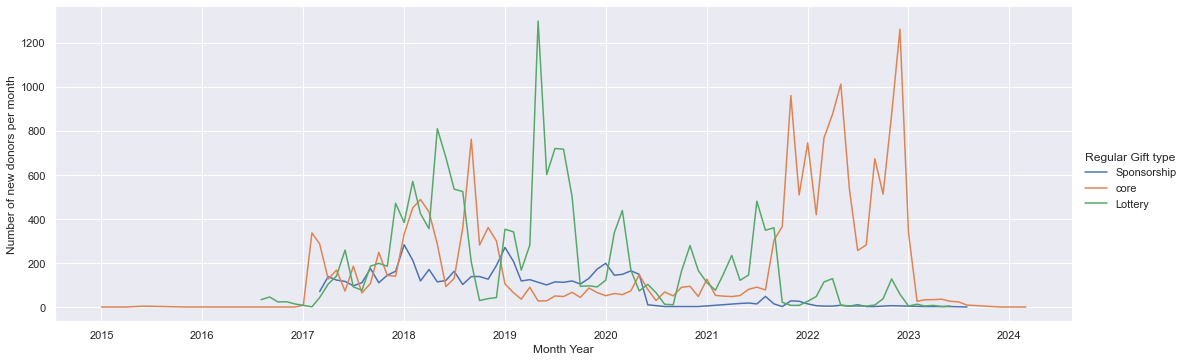

In [42]:
sns.relplot(data=df1[df1['Month Year'].between('2015-01-01','2024-03-01')], x='Month Year', y='Number of new donors per month',kind='line',hue='Regular Gift type', height=5, aspect=3, ci=None)